# FIFA Exploratory Data Analysis

The goal of this notebook is to answer the following question:
- What attributes affect if a player has a "high salary", "average salary", or "low salary"? 

Our data is from: https://www.kaggle.com/stefanoleone992/fifa-21-complete-player-dataset

## Imports

In [166]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/My Drive/STATS402/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [167]:
df = pd.read_csv(drive_dir + 'players_21.csv')
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,...,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,...,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,...,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,...,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,90000000,270000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,166500000.0,"#Speedster, #Dribbler, #Playmaker, #FK Special...",LW,10.0,NaN,2017-08-03,2022.0,NaN,NaN,91.0,85.0,86.0,94.0,36.0,59.0,NaN,...,51,36,87,90,92,93,NaN,30,29,9,9,15,15,11,84+3,84+3,84+3,90+0,89+0,89+0,89+0,90+0,90+1,90+1,90+1,90+1,83+3,83+3,83+3,90+1,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


It would be interesting to see how 
- `age`
- `nationality`
- `league_name`
- `league_rank`
- `overall`
- `potential`
- `player_positions`
- `international_reputation` 

affect a player's wage.

## Basic Initial Exploration

In [168]:
df.shape

(18944, 106)

In [169]:
for c in df.columns:
    n_missing = df[c].isna().sum()
    pct_missing = n_missing / df.shape[0]
    if n_missing > 0:
      print(f'{c}: {n_missing} ({100*pct_missing:.2f}%) missing values')

club_name: 225 (1.19%) missing values
league_name: 225 (1.19%) missing values
league_rank: 225 (1.19%) missing values
release_clause_eur: 995 (5.25%) missing values
player_tags: 17536 (92.57%) missing values
team_position: 225 (1.19%) missing values
team_jersey_number: 225 (1.19%) missing values
loaned_from: 18186 (96.00%) missing values
joined: 983 (5.19%) missing values
contract_valid_until: 225 (1.19%) missing values
nation_position: 17817 (94.05%) missing values
nation_jersey_number: 17817 (94.05%) missing values
pace: 2083 (11.00%) missing values
shooting: 2083 (11.00%) missing values
passing: 2083 (11.00%) missing values
dribbling: 2083 (11.00%) missing values
defending: 2083 (11.00%) missing values
physic: 2083 (11.00%) missing values
gk_diving: 16861 (89.00%) missing values
gk_handling: 16861 (89.00%) missing values
gk_kicking: 16861 (89.00%) missing values
gk_reflexes: 16861 (89.00%) missing values
gk_speed: 16861 (89.00%) missing values
gk_positioning: 16861 (89.00%) missing 

In [170]:
df = df.drop(['defending_marking', 'nation_jersey_number'], axis='columns')

In [171]:
df.shape

(18944, 104)

## Feature Engineering of the Target Variable using `wage_eur`

Text(0.5, 1.0, 'Histogram of wage_eur')

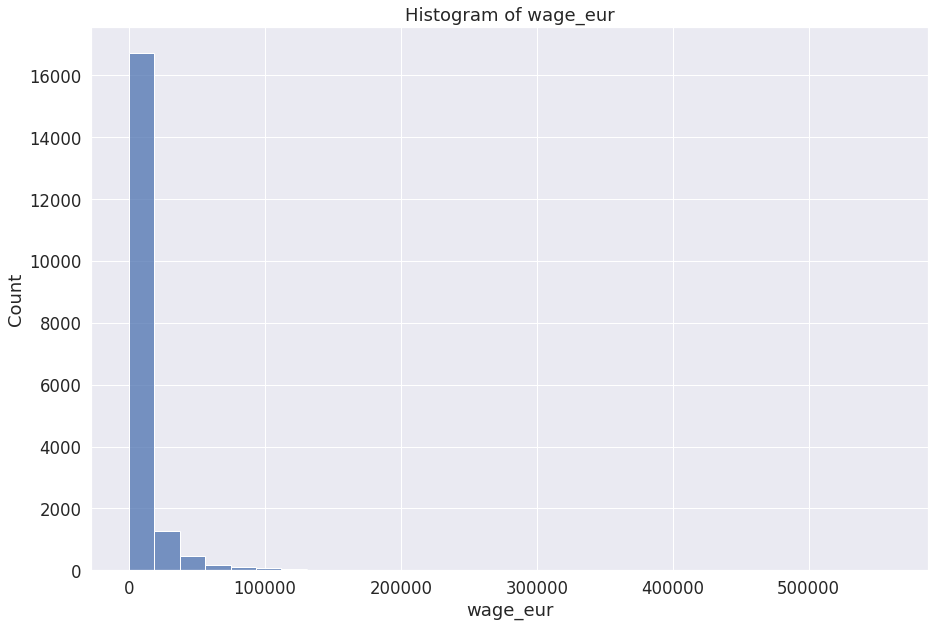

In [172]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
hist = sns.histplot(data=df, x='wage_eur', bins=30)
hist.set_title('Histogram of wage_eur')

In [173]:
df['wage_eur_log'] = np.log(df['wage_eur']).replace(-np.inf, 0)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Histogram of log of wage_eur')

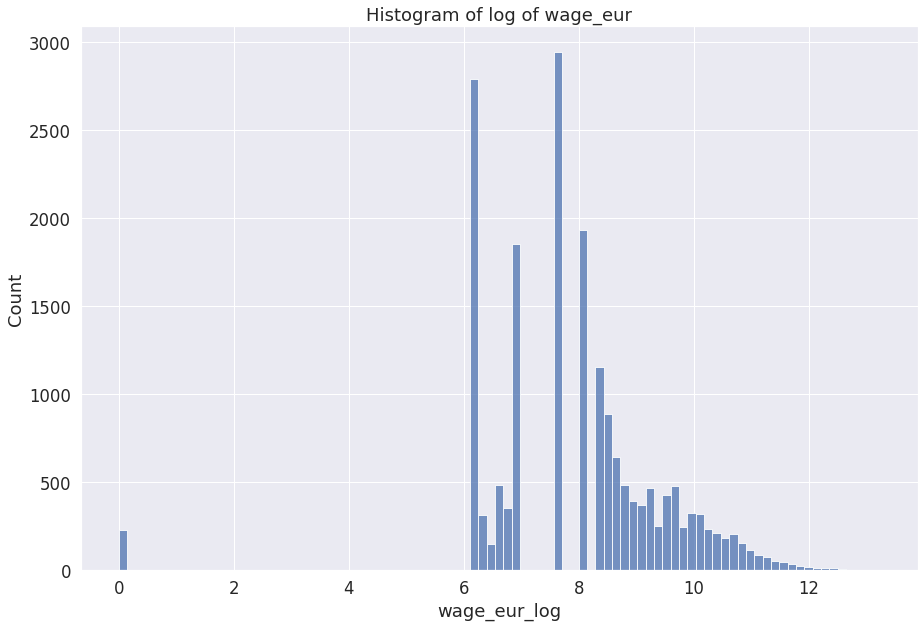

In [174]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
hist = sns.histplot(data=df, x='wage_eur_log')
hist.set_title('Histogram of log of wage_eur')

In [175]:
df['wage_eur'].describe(percentiles=[0, 1/3, 2/3, 1])

count     18944.000000
mean       8675.852513
std       19654.774894
min           0.000000
0%            0.000000
33.3%      2000.000000
50%        3000.000000
66.7%      5000.000000
100%     560000.000000
max      560000.000000
Name: wage_eur, dtype: float64

In [176]:
df['wage_cat'] = pd.cut(df.wage_eur,bins=[-0.001,2000,5000,560000],labels=['low salary', 'average salary', 'high salary'])

In [177]:
df['wage_cat'].value_counts()

low salary        9111
high salary       5855
average salary    3978
Name: wage_cat, dtype: int64

In [178]:
df.to_csv(drive_dir + 'players_21_with_target.csv', index=False)

# EDA

It would be interesting to see how 
- `age`
- `nationality`
- `league_name`
- `league_rank`
- `overall`
- `potential`
- `player_positions`
- `international_reputation` 

affect a player's salary.

## Exploring Age

In [180]:
df['age'].describe()

count    18944.000000
mean        25.225823
std          4.697354
min         16.000000
25%         21.000000
50%         25.000000
75%         29.000000
max         53.000000
Name: age, dtype: float64

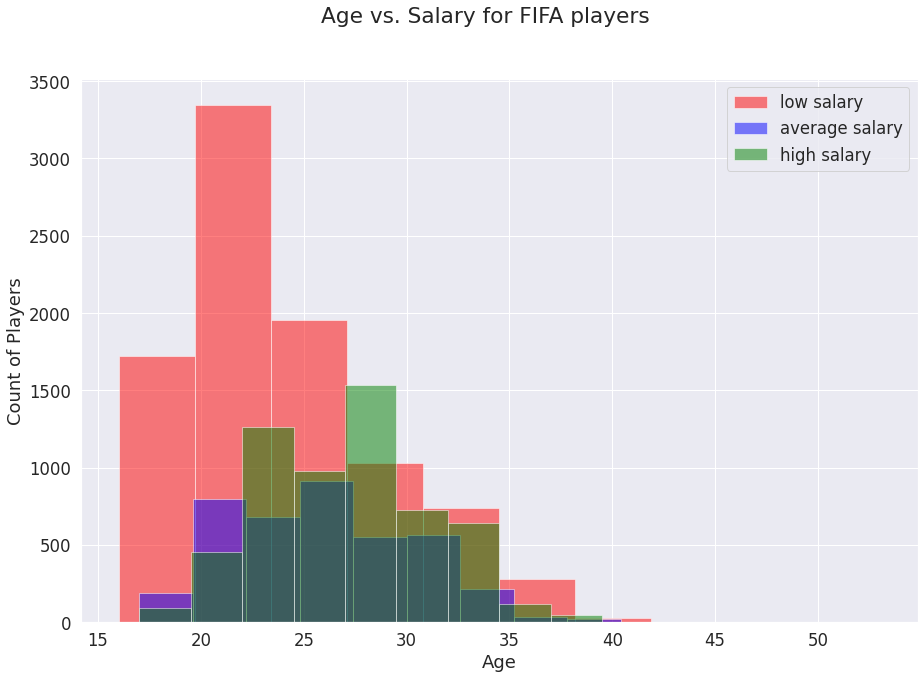

In [181]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.hist(df[df['wage_cat'] == 'low salary']['age'], alpha = 0.5, color = 'red', label = 'low salary')
ax.hist(df[df['wage_cat'] == 'average salary']['age'], alpha = 0.5, color = 'blue', label = 'average salary')
ax.hist(df[df['wage_cat'] == 'high salary']['age'], alpha = 0.5, color = 'green', label = 'high salary')
ax.set_xlabel('Age')
ax.set_ylabel('Count of Players')
fig.suptitle('Age vs. Salary for FIFA players')
ax.legend();

Text(0.5, 1.0, 'Boxplot of Age for Different Salaries')

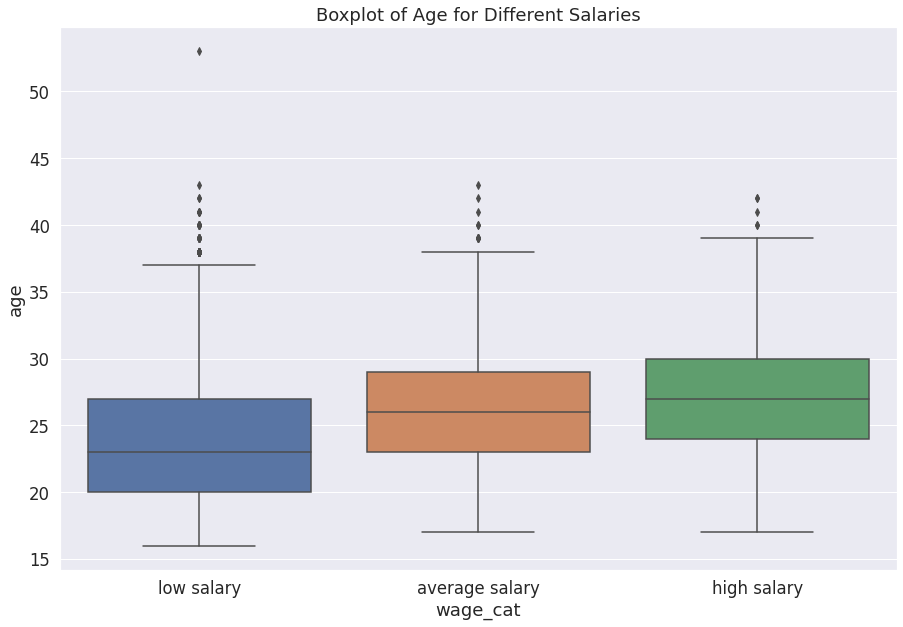

In [198]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
boxplt = sns.boxplot(data=df, x='wage_cat', y = 'age')
boxplt.set_title("Boxplot of Age for Different Salaries")

## Exploring Top 5 Nationalities

In [182]:
df['nationality'].value_counts()

England        1685
Germany        1189
Spain          1072
France          984
Argentina       936
               ... 
Barbados          1
Tanzania          1
Saint Lucia       1
Chad              1
Macau             1
Name: nationality, Length: 162, dtype: int64

Text(0.5, 0.98, 'Nationality vs. Salary for FIFA players')

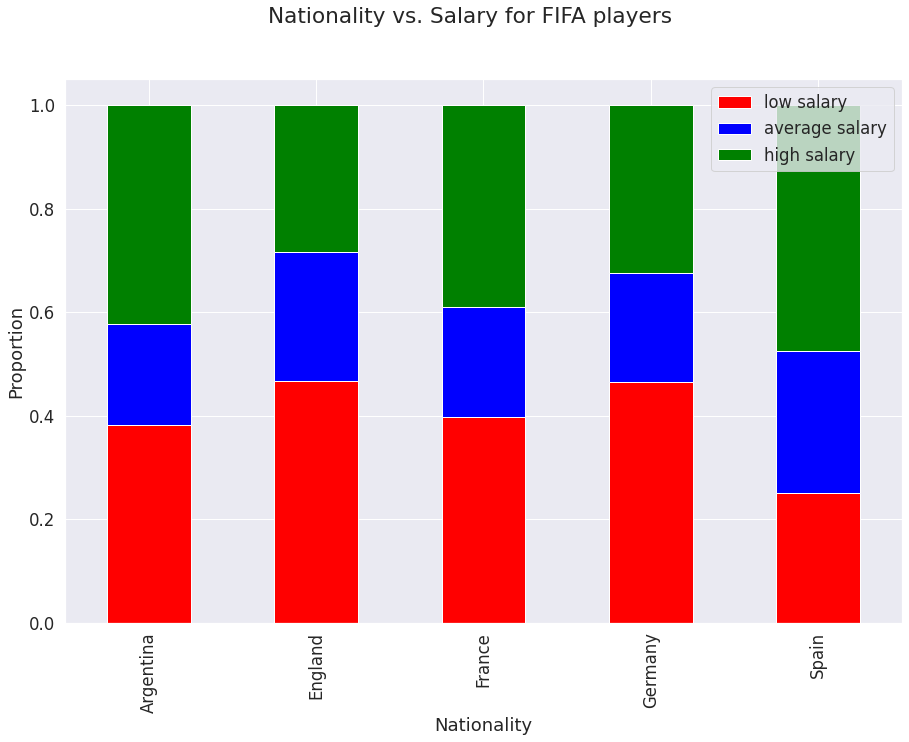

In [183]:
counts_df = df[(df['nationality']=='England') | (df['nationality']=='Germany') | (df['nationality']=='Spain') | (df['nationality']=='France') | (df['nationality']=='Argentina')]
counts_df_2 = counts_df.groupby(['nationality', 'wage_cat'])['sofifa_id'].count().unstack()
wage_percents_df = counts_df_2.T.div(counts_df_2.T.sum()).T

sns.set(font_scale = 1.5)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

wage_percents_df.plot(kind = 'bar', stacked = True, color = ['red', 'blue', 'green'], ax = ax)
ax.set_xlabel('Nationality')
ax.set_ylabel('Proportion')

color_patches = [Patch(facecolor = 'red', label = 'low salary'), Patch(facecolor = 'blue', label = 'average salary'), Patch(facecolor = 'green', label = 'high salary')]
ax.legend(handles = color_patches)

fig.suptitle('Nationality vs. Salary for FIFA players')

## Exploring Top 5 Leagues

In [184]:
df['league_name'].value_counts()

English League Championship             709
USA Major League Soccer                 701
Argentina Primera División              659
English Premier League                  654
Italian Serie A                         645
Spain Primera Division                  645
English League One                      630
Spanish Segunda División                619
English League Two                      605
French Ligue 1                          600
Turkish Süper Lig                       589
German 1. Bundesliga                    548
French Ligue 2                          546
German 3. Bundesliga                    522
Japanese J. League Division 1           521
Portuguese Liga ZON SAGRES              510
Mexican Liga MX                         509
German 2. Bundesliga                    507
Belgian Jupiler Pro League              492
Holland Eredivisie                      466
Chinese Super League                    436
Saudi Abdul L. Jameel League            435
Polish T-Mobile Ekstraklasa     

Text(0.5, 0.98, 'League vs. Salary for FIFA players')

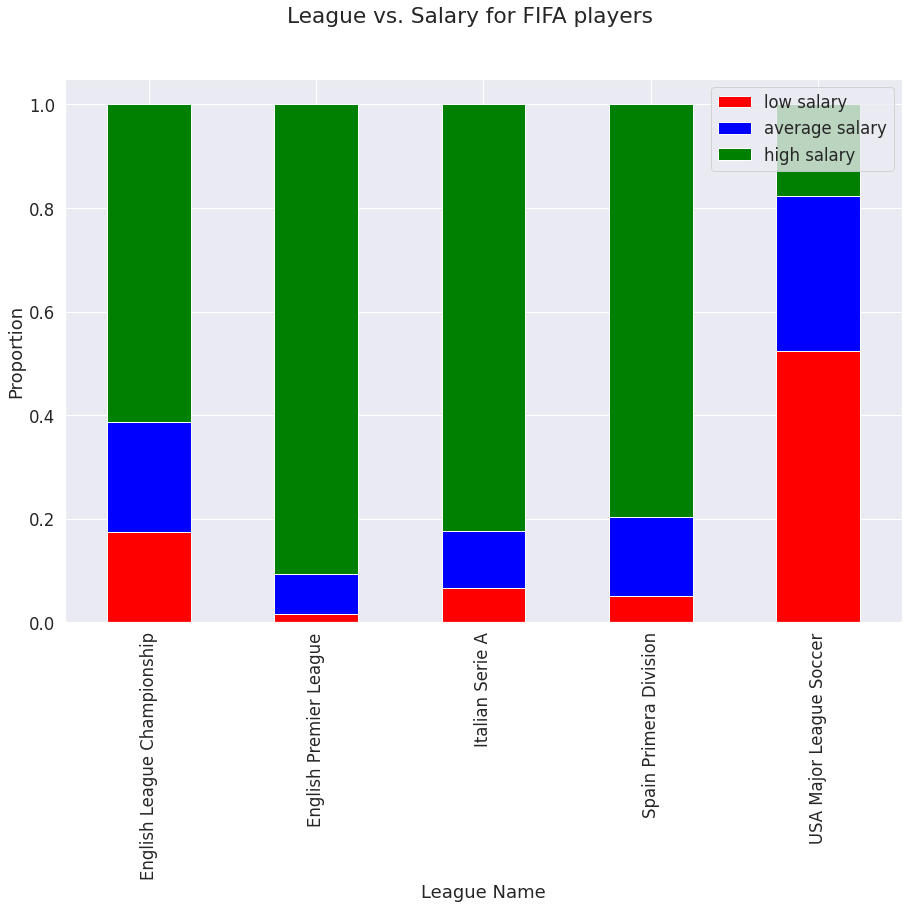

In [185]:
counts_df = df[(df['league_name']=='English League Championship') | (df['league_name']=='USA Major League Soccer') | (df['league_name']=='Argentina Primera División ') | (df['league_name']=='English Premier League') | (df['league_name']=='Italian Serie A') | (df['league_name']=='Spain Primera Division')]
counts_df_2 = counts_df.groupby(['league_name', 'wage_cat'])['sofifa_id'].count().unstack()
wage_percents_df = counts_df_2.T.div(counts_df_2.T.sum()).T

sns.set(font_scale = 1.5)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

wage_percents_df.plot(kind = 'bar', stacked = True, color = ['red', 'blue', 'green'], ax = ax)
ax.set_xlabel('League Name')
ax.set_ylabel('Proportion')

color_patches = [Patch(facecolor = 'red', label = 'low salary'), Patch(facecolor = 'blue', label = 'average salary'), Patch(facecolor = 'green', label = 'high salary')]
ax.legend(handles = color_patches)

fig.suptitle('League vs. Salary for FIFA players')

## Exploring League Rank

In [186]:
df['league_rank'].value_counts()

1.0    14397
2.0     2565
3.0     1152
4.0      605
Name: league_rank, dtype: int64

Text(0.5, 0.98, 'League Rank vs. Salary for FIFA players')

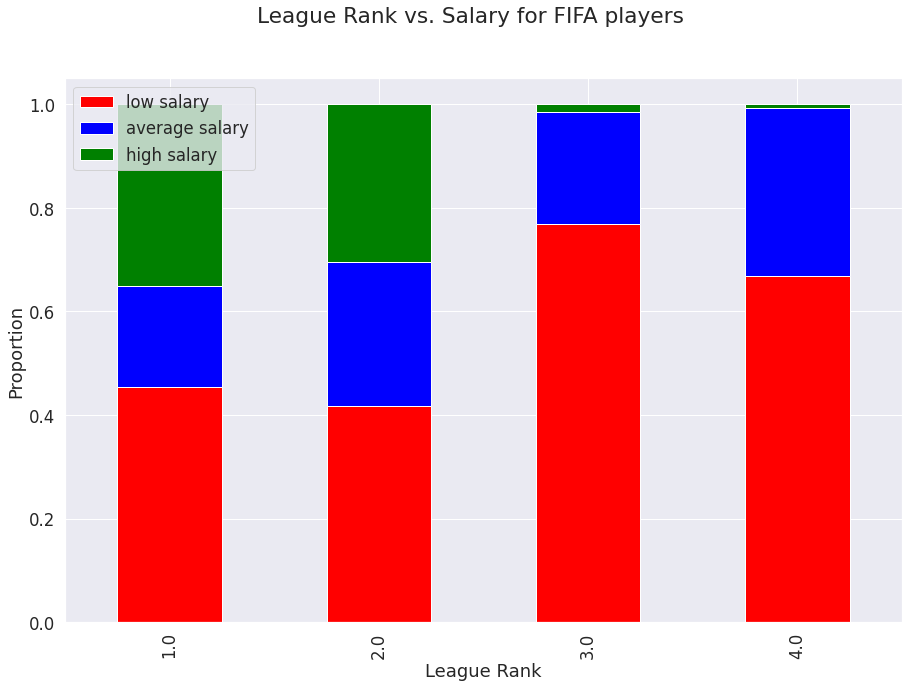

In [190]:
counts_df = df.groupby(['league_rank', 'wage_cat'])['sofifa_id'].count().unstack()
wage_percents_df = counts_df.T.div(counts_df.T.sum()).T

sns.set(font_scale = 1.5)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

wage_percents_df.plot(kind = 'bar', stacked = True, color = ['red', 'blue', 'green'], ax = ax)
ax.set_xlabel('League Rank')
ax.set_ylabel('Proportion')

color_patches = [Patch(facecolor = 'red', label = 'low salary'), Patch(facecolor = 'blue', label = 'average salary'), Patch(facecolor = 'green', label = 'high salary')]
ax.legend(handles = color_patches)

fig.suptitle('League Rank vs. Salary for FIFA players')

Text(0.5, 0.98, 'Salary vs. League Rank for FIFA players')

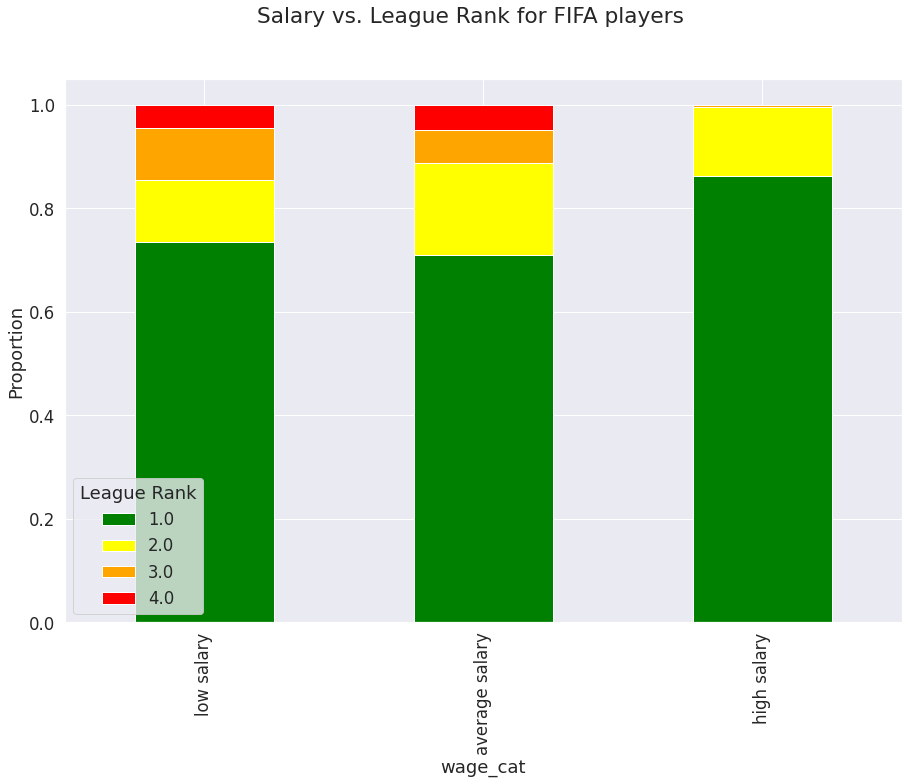

In [193]:
league_rank_df = counts_df.div(counts_df.sum()).T
sns.set(font_scale = 1.5)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
league_rank_df.plot(kind = 'bar', stacked = True, color = ['green', 'yellow', 'orange', 'red'], ax = ax)
ax.legend(title = 'League Rank')
ax.set_ylabel('Proportion')
fig.suptitle('Salary vs. League Rank for FIFA players')

## Exploring Overall

In [195]:
df['overall'].describe()

count    18944.000000
mean        65.677787
std          7.002278
min         47.000000
25%         61.000000
50%         66.000000
75%         70.000000
max         93.000000
Name: overall, dtype: float64

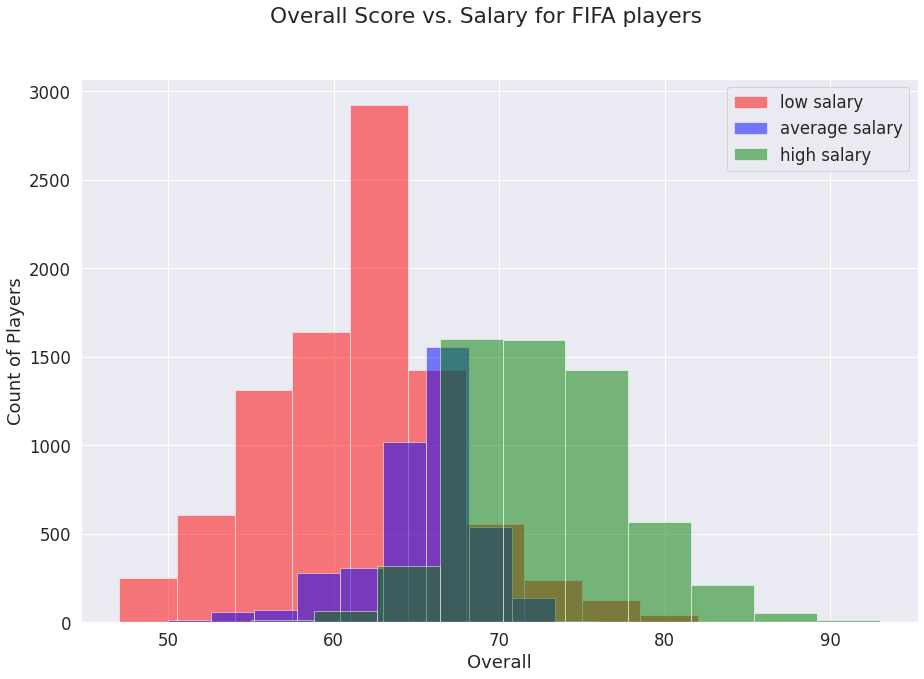

In [196]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.hist(df[df['wage_cat'] == 'low salary']['overall'], alpha = 0.5, color = 'red', label = 'low salary')
ax.hist(df[df['wage_cat'] == 'average salary']['overall'], alpha = 0.5, color = 'blue', label = 'average salary')
ax.hist(df[df['wage_cat'] == 'high salary']['overall'], alpha = 0.5, color = 'green', label = 'high salary')
ax.set_xlabel('Overall')
ax.set_ylabel('Count of Players')
fig.suptitle('Overall Score vs. Salary for FIFA players')
ax.legend();

Text(0.5, 1.0, 'Boxplot of Overall Score for Different Salaries')

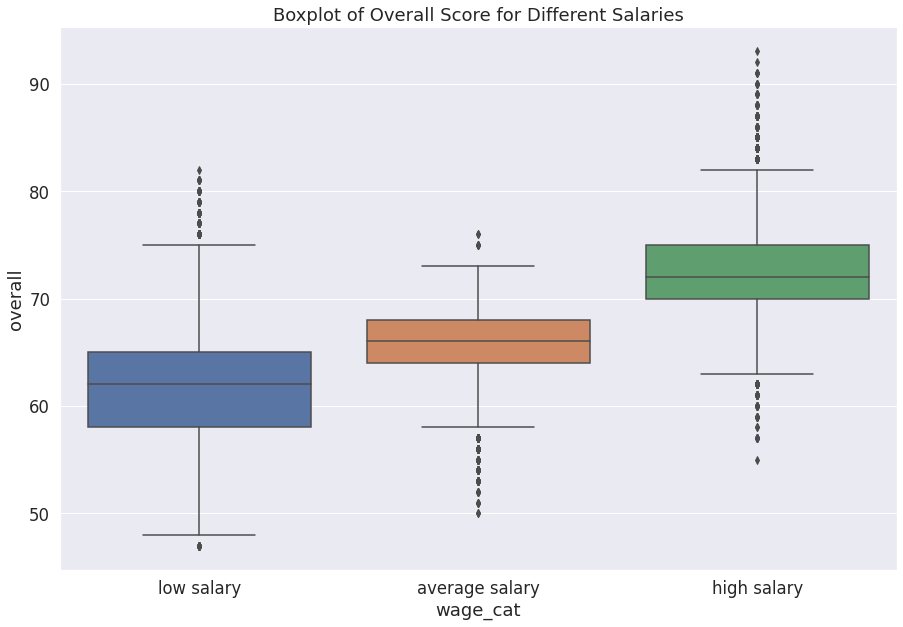

In [197]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
boxplt = sns.boxplot(data=df, x='wage_cat', y = 'overall')
boxplt.set_title("Boxplot of Overall Score for Different Salaries")

## Exploring Potential

In [199]:
df['potential'].describe()

count    18944.000000
mean        71.086729
std          6.109985
min         47.000000
25%         67.000000
50%         71.000000
75%         75.000000
max         95.000000
Name: potential, dtype: float64

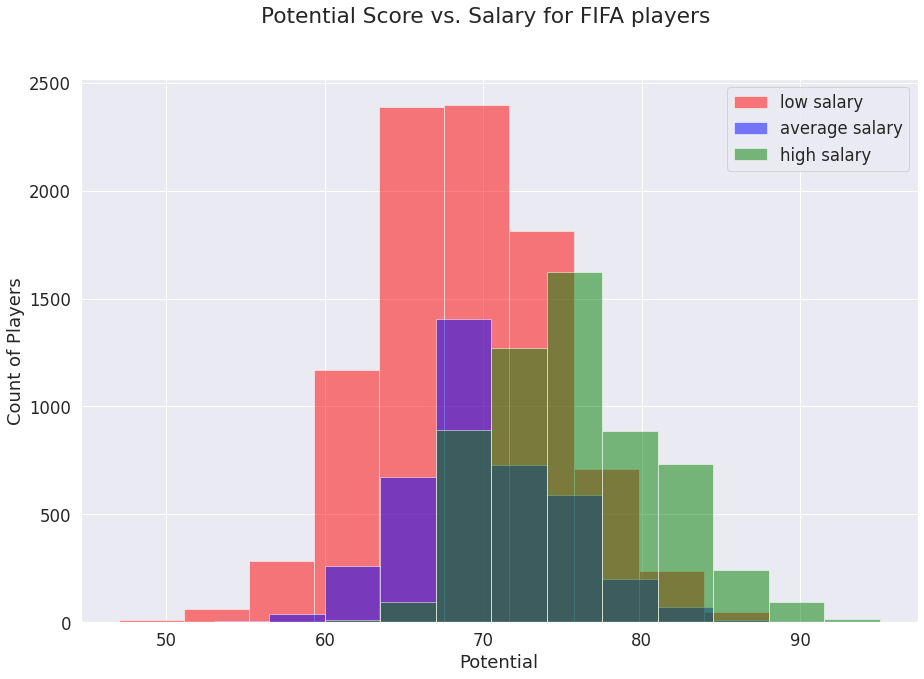

In [200]:
sns.set(font_scale = 1.5)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.hist(df[df['wage_cat'] == 'low salary']['potential'], alpha = 0.5, color = 'red', label = 'low salary')
ax.hist(df[df['wage_cat'] == 'average salary']['potential'], alpha = 0.5, color = 'blue', label = 'average salary')
ax.hist(df[df['wage_cat'] == 'high salary']['potential'], alpha = 0.5, color = 'green', label = 'high salary')
ax.set_xlabel('Potential')
ax.set_ylabel('Count of Players')
fig.suptitle('Potential Score vs. Salary for FIFA players')
ax.legend();

Text(0.5, 1.0, 'Boxplot of Potential Score for Different Salaries')

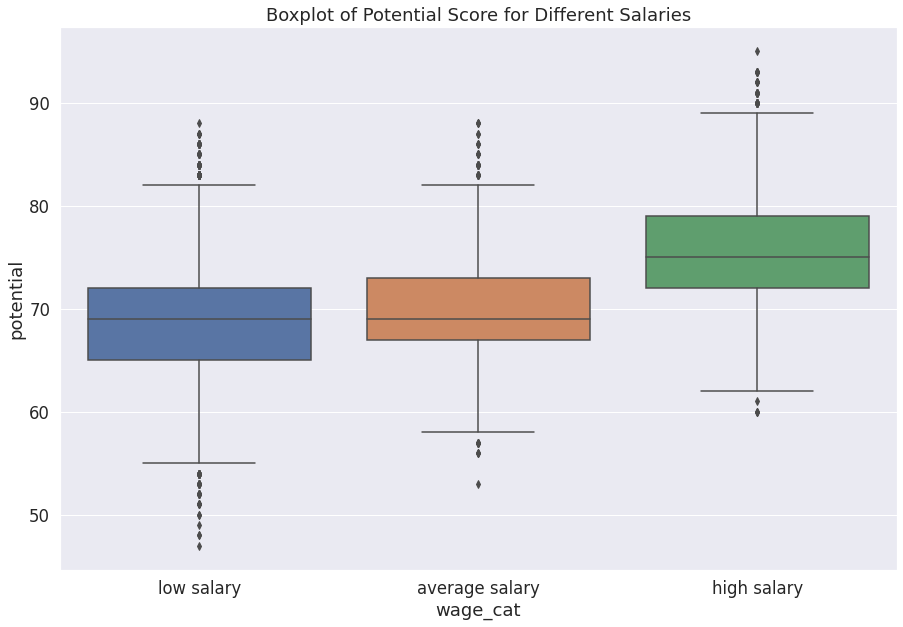

In [201]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
boxplt = sns.boxplot(data=df, x='wage_cat', y = 'potential')
boxplt.set_title("Boxplot of Potential Score for Different Salaries")

## Exploring Top 5 Positions

In [202]:
df['player_positions'].value_counts()

CB              2437
GK              2083
ST              1893
CDM, CM          827
CM               810
                ... 
RW, LW, RWB        1
LB, LWB, CDM       1
CM, LM, ST         1
RW, RB, RM         1
GK, RB             1
Name: player_positions, Length: 611, dtype: int64

- CB: center back
- GK: goalkeeper
- ST: striker
- CDM, CM: central defensive midfielders, center midfielder
- CM: center midfielder

Text(0.5, 0.98, 'Position vs. Salary for FIFA players')

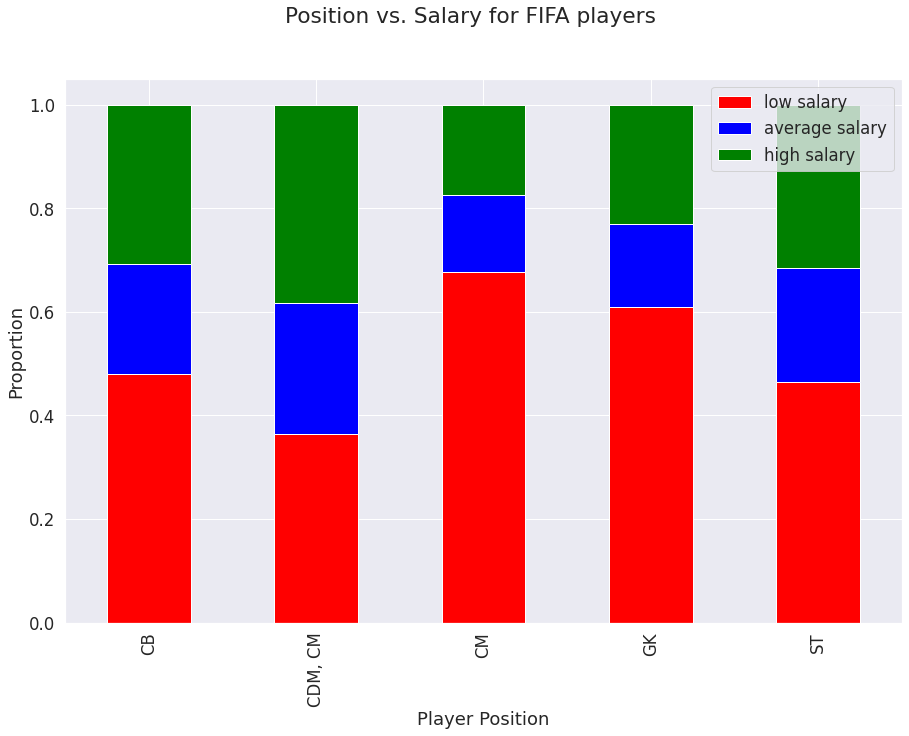

In [203]:
counts_df = df[(df['player_positions']=='CB') | (df['player_positions']=='GK') | (df['player_positions']=='ST') | (df['player_positions']=='CDM, CM') | (df['player_positions']=='CM')]
counts_df_2 = counts_df.groupby(['player_positions', 'wage_cat'])['sofifa_id'].count().unstack()
wage_percents_df = counts_df_2.T.div(counts_df_2.T.sum()).T

sns.set(font_scale = 1.5)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

wage_percents_df.plot(kind = 'bar', stacked = True, color = ['red', 'blue', 'green'], ax = ax)
ax.set_xlabel('Player Position')
ax.set_ylabel('Proportion')

color_patches = [Patch(facecolor = 'red', label = 'low salary'), Patch(facecolor = 'blue', label = 'average salary'), Patch(facecolor = 'green', label = 'high salary')]
ax.legend(handles = color_patches)

fig.suptitle('Position vs. Salary for FIFA players')

## Exploring International Reputation

In [204]:
df['international_reputation'].value_counts()

1    17593
2     1017
3      285
4       43
5        6
Name: international_reputation, dtype: int64

The higher the international reputation, the better.

Text(0.5, 0.98, 'International Reputation vs. Salary for FIFA players')

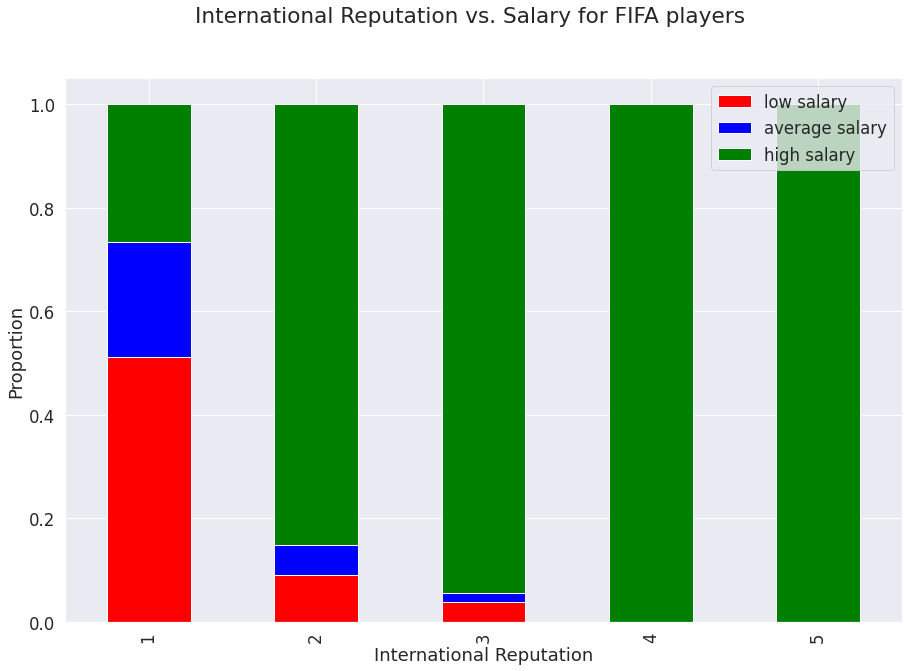

In [205]:
counts_df = df.groupby(['international_reputation', 'wage_cat'])['sofifa_id'].count().unstack()
wage_percents_df = counts_df.T.div(counts_df.T.sum()).T

sns.set(font_scale = 1.5)
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

wage_percents_df.plot(kind = 'bar', stacked = True, color = ['red', 'blue', 'green'], ax = ax)
ax.set_xlabel('International Reputation')
ax.set_ylabel('Proportion')

color_patches = [Patch(facecolor = 'red', label = 'low salary'), Patch(facecolor = 'blue', label = 'average salary'), Patch(facecolor = 'green', label = 'high salary')]
ax.legend(handles = color_patches)

fig.suptitle('International Reputation vs. Salary for FIFA players')